# Test KL minimization with invertible transformation

In [1]:
import matplotlib.pyplot as plt
import torch

from gpsr.beams import NSFDist

In [2]:
class Prior:
    def log_prob(self, x: torch.Tensor) -> torch.Tensor:
        x1 = x[:, 0]
        x2 = x[:, 1]
        return torch.sin(torch.pi * x1) - 2 * (x1**2 + x2**2 - 2.0) ** 2

In [3]:
ndim = 2
nsamp = 10_000

prior = Prior()

dist = NSFDist(width=64, depth=3, layers=3, ndim=ndim)
optimizer = torch.optim.Adam(dist.parameters(), lr=0.01)

history = {"loss": []}

for iteration in range(200):
    loss = -dist.entropy(nsamp, prior=prior)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    history["loss"].append(loss.item())

    if iteration % 10 == 0:
        print(iteration, loss)

0 tensor(6.3924, grad_fn=<NegBackward0>)
10 tensor(-0.1136, grad_fn=<NegBackward0>)
20 tensor(-0.5151, grad_fn=<NegBackward0>)
30 tensor(-0.8193, grad_fn=<NegBackward0>)
40 tensor(-1.2069, grad_fn=<NegBackward0>)
50 tensor(-1.4203, grad_fn=<NegBackward0>)
60 tensor(-1.4882, grad_fn=<NegBackward0>)
70 tensor(-1.5201, grad_fn=<NegBackward0>)
80 tensor(-1.5678, grad_fn=<NegBackward0>)
90 tensor(-1.5753, grad_fn=<NegBackward0>)
100 tensor(-1.5831, grad_fn=<NegBackward0>)
110 tensor(-1.5846, grad_fn=<NegBackward0>)
120 tensor(-1.5980, grad_fn=<NegBackward0>)
130 tensor(-1.5953, grad_fn=<NegBackward0>)
140 tensor(-1.5973, grad_fn=<NegBackward0>)
150 tensor(-1.5994, grad_fn=<NegBackward0>)
160 tensor(-1.5954, grad_fn=<NegBackward0>)
170 tensor(-1.6001, grad_fn=<NegBackward0>)
180 tensor(-1.6017, grad_fn=<NegBackward0>)
190 tensor(-1.5951, grad_fn=<NegBackward0>)


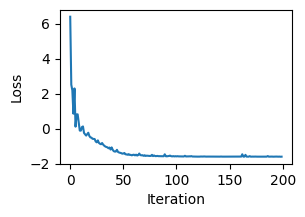

In [4]:
fig, ax = plt.subplots(figsize=(3.0, 2.0))
ax.plot(history["loss"])
ax.set_xlabel("Iteration")
ax.set_ylabel("Loss")
plt.show()

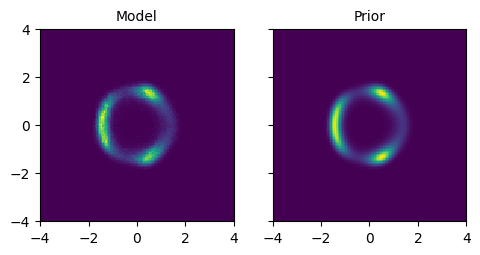

In [5]:
with torch.no_grad():
    grid_shape = (128, 128)
    grid_edges = [torch.linspace(-4.0, 4.0, n + 1) for n in grid_shape]
    grid_coords = [0.5 * (e[:-1] + e[1:]) for e in grid_edges]
    grid_points = torch.stack(
        [c.ravel() for c in torch.meshgrid(*grid_coords, indexing="ij")], axis=-1
    )
    grid_values = torch.exp(prior.log_prob(grid_points)).reshape(grid_shape)

    x = dist.sample(256_000)

    fig, axs = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(5.5, 2.5))
    axs[0].hist2d(x[:, 0], x[:, 1], bins=grid_edges)
    axs[1].pcolormesh(grid_coords[0], grid_coords[1], grid_values.T)
    axs[0].set_title("Model", fontsize="medium")
    axs[1].set_title("Prior", fontsize="medium")
    plt.show()